# Project 1: SAT & ACT Analysis

## Problem Statement

The new format for the SAT was released in March 2016. New SAT <br>
a. combines the reading and writing sections and made up half total score (before was 2/3 of total score), <br>
b. no penalty for incorrect answer <br>
c. students are more well-informed about the different parts to be tested in the exam <br>

Despite the change, the participation rate of SAT is lower compared ACT. We would like to find out :<br>
a. the possible impact due to the change of SAT format<br>
b. what could College Board do to get the most utility out of finite resources

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Import all the libraries
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, skew

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#move one directory up, code and data are in different directory, #getcwd, get current working directory,
os.chdir('..')
path = os.getcwd()
path

'/Users/chowmun/Desktop/classes.git/experiment/projects1234/project_1'

In [3]:
sat_2017 = pd.read_csv(path + '/data/sat_2017.csv')
act_2017 = pd.read_csv(path + '/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [7]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [8]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


 Answer: 
 
1. act_2017 has a dataframe of size 52rows x 7columns and the data types are either object or float. 'State' is a categorical/nominal data type as states are unordered and mutually exclusive. The other four columns appear to be of numerical/continuous data types where 'Total is the sum of the 'Evidence-Based Reading and Writing' and 'Math' .'Participation' is of continous data type with a maximum of 100%.<br><br>
2. sat_2017 has a dataframe of size 51rows x 5columns and the data types are either object or integer. 'State' is a categorical/nominal data type as states are unordered and mutually exclusive. 'Participation' is of continous data type with a maximum of 100%. 'English', 'Mat', 'Reading', 'Science' and 'Composite' columns are of numerical/continuous data types.<br><br>
3. The mean of both data are near to their median respectively, this could suggests that their data are normally distributed. <br><br>
4. Based on **std**:<br> 
   a. for act_2017, the probability distribution of 'Science' is widest, follow by 'English' then 'Reading' and end with 'Math'. This means that most students scored toward the mean in 'Math' subject compared to the other subjects.<br /> 
   b. for sat_2017, more students scored further away from the mean in 'Math' subject compared to 'ERW'.

#### 4a. Does the data look complete? 

Answer:
Yes, there are not missing values in the datasets.<br /> 

#### 4b. Are there any obvious issues with the observations?
**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**
Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
1. The range for SAT score is from 200~800. From sat_2017.describe(), the min value for 'Math' is 52 which is out of the range. 
2. Given that the 'Composite' is exactly that, a composite of ACT objects, having a min of 2.3 for Science is questionable.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

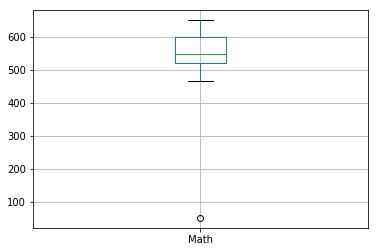

In [10]:
#plot a boxplot to identify the outlier(s)
sat_2017.Math.plot.box(grid=True)

In [11]:
#Only 1 outlier, which is the one we found from the df.describe()
sat_2017[sat_2017['Math'] == 52]  #find the index loc of the error

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
sat_2017.loc[20, 'Math'] = 524  #change the value

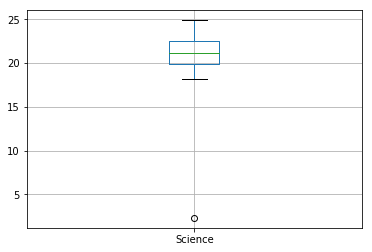

In [13]:
#doing the same for 'Science'
act_2017.Science.plot.box(grid=True)

In [14]:
act_2017[act_2017['Science'] == 2.3]  #find the index loc of the error

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [15]:
#change the value
act_2017.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
1. Data type for 'Participation' in both tests are 'object' due to the  '%' symbol. Since 'Participation' is a continuous data type, we need to remove '%' from the data and change its data type to 'int'.
2. 'Composite' in act_2017 should be 'float' instead of 'object'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe. (map for 1 series, apply for 1 dataframe

In [18]:
def change_type(n):
    n = n[:-1]
    return int(n)

#short coming of this function: n must be a number, else will have an error

In [19]:
#https://www.ritchieng.com/pandas-apply/
# https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/

In [20]:
sat_2017['Participation'] = sat_2017['Participation'].map(change_type)
act_2017['Participation'] = act_2017['Participation'].map(change_type)

In [21]:
#when mapping the change_type function got error, this means % is not the only reason caused the problem.
#in that case, we use a function with 'try and except', return a list which cant be converted to float(number)
def is_number(a):
    a_list = []
    for i in a:
        try:
#             print(i)
            i= float(i)
        except:
            a_list.append(i)
    return a_list

is_number(sat_2017['Participation']) #if return an empty string, all data is number
                                     #actually we will know it if running 'change type' and prompt an error

[]

- Fix any individual values preventing other columns from being the appropriate type.

In [22]:
#use the function to identify any data which is consist of not only number
is_number(act_2017['Composite'])

['20.2x']

In [23]:
#locate the error
act_2017[act_2017['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [24]:
#change the value
act_2017.loc[51, 'Composite'] = 20.2

In [25]:
#change the data type for the column
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
#rename the 'Participation' to explain the value
sat_2017 = sat_2017.rename(columns = {'Participation': 'Participation (%)'})
act_2017 = act_2017.rename(columns = {'Participation': 'Participation (%)'})

- Display the data types again to confirm they are correct.

In [27]:
act_2017.dtypes

State                 object
Participation (%)      int64
English              float64
Math                 float64
Reading              float64
Science              float64
Composite            float64
dtype: object

In [28]:
sat_2017.dtypes

State                                 object
Participation (%)                      int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
#changing cols using .columns()
act_2017.columns = ['state', 'act2017_participation(%)', 'act2017_english', 
                    'act2017_math', 'act2017_reading','act2017_science','act2017_composite']
act_2017.head(3)

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8


In [30]:
sat_2017.columns = ['state', 'sat2017_participation(%)', 'sat2017_erw', 'sat2017_math','sat2017_total']
sat_2017.head(3)

,state,sat2017_participation(%),sat2017_erw,sat2017_math,sat2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|ACT & SAT|The name of state in United States| 
|**act2017_participation(%)**|integer|ACT|Percentage of high school students taking ACT| 
|**act2017_english**|float|ACT|The score for English section in ACT| 
|**act2017_math**|float|ACT|The score for Mathematics section in ACT| 
|**act2017_reading**|float|ACT|The score for Reading section in ACT| 
|**act2017_science**|float|ACT|The score for Science section in ACT|
|**act2017_composite**|float|ACT|The average of English, Math, Reading and Science section scores| 
|**sat2017_participation(%)**|integer|SAT|Percentage of high school students taking SAT| 
|**sat2017_erw**|integer|SAT|Total score for Essay, Reading and Writing(ERW) section in SAT| 
|**sat2017_math**|integer|SAT|The score for Mathematics section in SAT| 
|**sat2017_total**|integer|SAT|The summation of score for Mathematic and ERW section in SAT| 



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In sat_2017, 'National' is treated as a part of the country.

In [31]:
#extract 'National' from sat_2017 and keep the data in avg_act_2017
avg_act_2017 = act_2017.loc[0]
#update act_2017, drop[0] will remove index[0] so can't repeat this step a few times.
#Use inplace=True if never assign back to act_2017
act_2017 = act_2017.drop([0], axis=0)

In [32]:
act_2017.head(3)

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
combined_2017 = act_2017.merge(sat_2017, on='state')
combined_2017.head(3)

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,sat2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
# a = os.getcwd()
# https://datatofish.com/export-dataframe-to-csv/
# https://automatetheboringstuff.com/chapter8/

In [35]:
combined_2017.to_csv('./data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

1.Data collection:

a. For ACT 2018, the data is available in different separated pdf files, thus that is a need to extract them individualy and gathered as an excel file.

b. The table in SAT 2018 contains some information which can not be copy and paste into excel file. Thus, export it in JPEG(or other format of a pic) and pass through this website https://smallseotools.com/image-to-text-converter/, which resulting in a string of text. Then, copy the text into excel file for data management. Also, need to search for other data which are provided.

2.Import data as dataframe using relative path.

In [36]:
sat_2018 = pd.read_csv('./data/sat_2018.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')

3.Check the size, missing value and data type of the dataframe.

In [37]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
Composite        52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [38]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


3a. The number of country is the same as the number of row in the dataframe which is 51 in our case. From the observation, act_2018 got an extra row, 'National' which is the average result. We need to remove it.

3b. The data type for 'participation' should be integar.

In [39]:
#3a.Keep 'National' in avg_act_2018, then remove it from act_2018
avg_act_2018 = act_2018.iloc[51]
act_2018 = act_2018.drop([51], axis = 0)

In [40]:
#3b.Call the function which we defined earlier on and apply
sat_2018['Participation'] = sat_2018['Participation'].map(change_type)

4.Check for the trend of data and find any inconsistency using '.describe()'. 

a.The max and min values for both dataframe are within the range set by the exams.

b.In act_2018, 'Composite' and other subjects have a comparable values, this suggests that the likelihood of data error due to human error is very low.

c.The mean and std is near for both dataframes, this give us an idea that the probablity of the results could be normally distributed. 

In [41]:
act_2018.describe()

,Participation,Composite,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [42]:
sat_2018.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,46.627451,567.294118,557.254902,1124.666667
std,38.014187,45.317676,48.887562,93.868561
min,2.000000,497.000000,480.000000,977.000000
25%,4.500000,535.000000,521.500000,1062.500000
50%,52.000000,552.000000,547.000000,1099.000000
75%,79.500000,616.500000,600.500000,1220.000000
max,100.000000,643.000000,655.000000,1298.000000


5.Change the columns name for both dataframes using similar format for those in 2017.

In [43]:
act_2018.columns = ['state', 'act2018_participation(%)', 'act2018_english', 
                    'act2018_math', 'act2018_reading','act2018_science','act2018_composite']
sat_2018.columns = ['state', 'sat2018_participation(%)', 'sat2018_erw', 'sat2018_math','sat2018_total']

6.Combine them and export as csv file.

In [44]:
combined_2018 = act_2018.merge(sat_2018, on='state')
combined_2018.to_csv('./data/combined_2018.csv')
combined_2018.head(3)

,state,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [45]:
final = combined_2017.merge(combined_2018, on='state')
final.to_csv('./data/final.csv')
final.head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [46]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act2017_participation(%),51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat2017_participation(%),51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat2017_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [47]:
#create a function to calculate the mean
def mean_result(df):
    return sum(df)/len(df)

#create a function to calculate the std
def std_result(df):
    mean = mean_result(df)
    n = len(df)
    y = [(i-mean)**2 for i in df]
    return (sum(y)/n)**0.5

In [48]:
#testing
std_result(final['act2017_reading'])

2.0469029314842646

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
#use this loop to derive the dict comprehension
# for i in final_csv.columns:
#     if i != 'state':
#         y = {i:std_result(final_csv[i])}

In [50]:
sd = {i: std_result(final[i]) for i in final.columns if i != 'state'}
sd

{'act2017_composite': 2.000786081581989,
 'act2017_english': 2.3304876369363363,
 'act2017_math': 1.9624620273436781,
 'act2017_participation(%)': 31.824175751231806,
 'act2017_reading': 2.0469029314842646,
 'act2017_science': 1.7222161451443676,
 'act2018_composite': 1.8516885484833543,
 'act2018_english': 2.0855261815801147,
 'act2018_math': 2.4222536143202795,
 'act2018_participation(%)': 33.745194881997506,
 'act2018_reading': 2.015707255555717,
 'act2018_science': 2.145891884510421,
 'sat2017_erw': 45.21697020437866,
 'sat2017_math': 46.65713364485503,
 'sat2017_participation(%)': 34.92907076664508,
 'sat2017_total': 91.58351056778743,
 'sat2018_erw': 44.87118561762388,
 'sat2018_math': 48.40589946919447,
 'sat2018_participation(%)': 37.63965409204986,
 'sat2018_total': 92.94372462792965}

In [51]:
#numpy => np.std()
sd_np = {i:np.std(final[i]) for i in final.columns if i != 'state'}
sd_np == sd #comparing calculated value with np.std

True

In [52]:
#pandas => df.std()
sd_pd = {i: final[i].std() for i in final.columns if i != 'state'}
sd_pd == sd #comparing calculated value with pandas.std()

False

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

For reference: http://johnthemathguy.blogspot.com/2014/07/standard-deviation-why-n-and-n-1.html <br />
The manual calculated std is not the same with the output from pandas `describe` but it is the same as numpy's `std` output. <br />
a.The pandas use sample standard deviation, which 'n-1' following bessel correction .<br>
b.While our manually calculated std use 'n' for calculation when the n refering to the population(N).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [53]:
#2017 SAT highest participation rate
final[final['sat2017_participation(%)'] == final['sat2017_participation(%)'].max()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011


In [54]:
#2017 SAT lowest participation rate
final[final['sat2017_participation(%)'] == final['sat2017_participation(%)'].min()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283


In [55]:
#2018 SAT highest participation rate
final[final['sat2018_participation(%)'] == final['sat2018_participation(%)'].max()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,36,22.3,21.9,21.6,23.2,22.1,100,508,493,1001
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011


In [56]:
#2018 SAT lowest participation rate
final[final['sat2018_participation(%)'] == final['sat2018_participation(%)'].min()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283


In [57]:
#2017 ACT highest participation rate
final[final['act2017_participation(%)'] == final['act2017_participation(%)'].max()].head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210


In [58]:
#2017 ACT lowest participation rate
final[final['act2017_participation(%)'] == final['act2017_participation(%)'].min()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013


In [59]:
#2018 ACT highest participation rate
final[final['act2018_participation(%)'] == final['act2018_participation(%)'].max()].head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236


In [60]:
#2018 ACT lowest participation rate
final[final['act2018_participation(%)'] == final['act2018_participation(%)'].min()]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013


In [61]:
#2017 SAT higheset total scores
final.sort_values('sat2017_total', ascending = True).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,36,22.3,21.9,21.6,23.2,22.1,100,508,493,1001
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013


In [62]:
#2017 SAT lowest total scores
final.sort_values('sat2017_total', ascending = False).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,100,20.5,19.8,20.3,20.6,20.8,3,641,653,1294
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,...,71,21.6,21.0,21.1,22.3,21.5,4,633,631,1265


In [63]:
#sat2018 lowest total scores
final.sort_values('sat2018_total', ascending = True).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
48,West Virginia,69,20.0,19.4,21.2,20.5,20.4,14,558,528,...,65,20.3,19.8,19.4,21.3,20.4,28,513,486,999
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,36,22.3,21.9,21.6,23.2,22.1,100,508,493,1001
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011


In [64]:
#sat2018 highest total scores
final.sort_values('sat2018_total', ascending = False).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,100,20.5,19.8,20.3,20.6,20.8,3,641,653,1294
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,...,71,21.6,21.0,21.1,22.3,21.5,4,633,631,1265


In [65]:
#act2017 lowest composite scores
final.sort_values('act2017_composite', ascending = True).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098


In [66]:
#act2017 highest composite scores
final.sort_values('act2017_composite', ascending = False).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977


In [67]:
#act2018 lowest composite scores
final.sort_values('act2018_composite', ascending = True).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099


In [68]:
#act2018 highest composite scores
final.sort_values('act2018_composite', ascending = False).head()

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
32,New York,31,23.8,24.0,24.6,23.9,24.2,67,528,523,...,27,24.5,24.2,24.2,24.9,24.2,79,534,534,1068
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011


**Do any states with 100% participation on a given test have a rate change year-to-year?**<br>

In [126]:
#check for rate change for both tests 
final['act_change'] = final['act2018_participation(%)']-final['act2017_participation(%)']
final['sat_change'] = final['sat2018_participation(%)']-final['sat2017_participation(%)']

#check act2017 with 100% participation rate but drop in 2018
final[(final['act2017_participation(%)'] == 100) & (final['act2018_participation(%)'] < 100)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total,act_change,sat_change
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,23.9,23.2,24.4,23.5,100,519,506,1025,-70,89
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,20.2,21.4,21.7,21.4,4,643,655,1298,-1,1


In [130]:
#check act2017 with 100% participation rate but drop in 2018
final[(final['sat2017_participation(%)'] == 100) & (final['sat2018_participation(%)'] < 100)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total,act_change,sat_change
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,23.7,22.7,24.4,23.0,92,497,480,977,0,-8


In [132]:
#check act with 100% participation rate in 2018 but not in 2017
final[(final['act2017_participation(%)'] < 100) & (final['act2018_participation(%)'] == 100)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total,act_change,sat_change
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,19.4,19.8,20.4,20.1,3,629,623,1252,16,0
35,Ohio,75,21.2,21.6,22.5,22.0,22.0,12,578,570,...,19.3,20.3,20.8,20.4,18,552,547,1099,25,6


In [128]:
#check sat with 100% participation rate in 2018 but not in 2017
final[(final['sat2017_participation(%)'] < 100) & (final['sat2018_participation(%)'] == 100)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total,act_change,sat_change
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,23.9,23.2,24.4,23.5,100,519,506,1025,-70,89
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,21.9,21.6,23.2,22.1,100,508,493,1001,-2,7


1.District of Columbia SAT participation rate change from 100% to 92%.<br>
2.Minnesota ACT participation rate change from 100% to 99% and Colorado ACT 100% to 30%. <br>
3.Nebraska and Ohio ACT participation rate change from 84% and 75% respectively to 100%.<br>
4.Colorado and Idaho SAT participation rate change from 11% and 93% respectively to 100%.

In [69]:
# Do any states have >50% participation on both tests either year?
final[(final['act2017_participation(%)'] > 50) & (final['sat2017_participation(%)']  > 50)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,97,522,493,1014
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099


In [70]:
final[(final['act2018_participation(%)'] > 50) & (final['sat2018_participation(%)']  > 50)]

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,97,522,493,1014
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070


**Identified any states that you're especially interested in? <br>
Make a note of these and state why you think they're interesting**.<br>
Colorado. In 2017, she has a high participation rate for act(100%) and low participation rate for sat(11%).
But in 2018, she has a high participation rate for sat(100%) and low participation rate for act(30%).

In [72]:
final[final.state == 'Colorado']

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

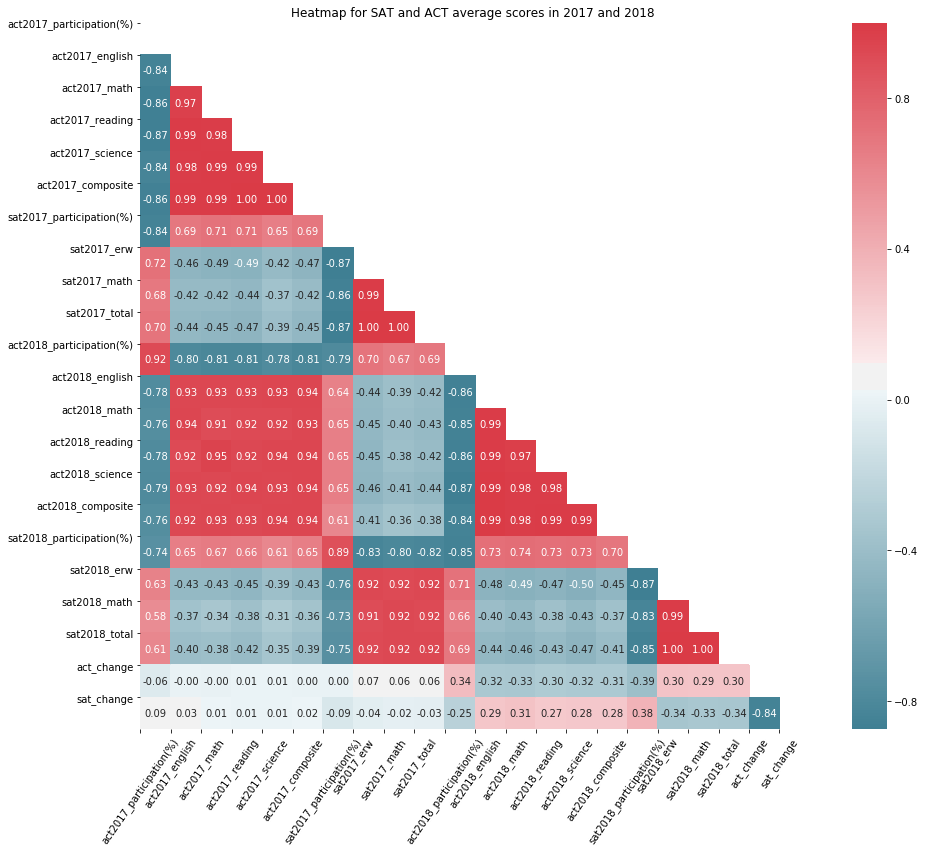

In [140]:
def heatMap(df, mirror, title, figsize=(15, 13)):

    corr = df.corr() # Create Correlation df
    fig, ax = plt.subplots(figsize=figsize) # Plot figsize
    colormap = sns.diverging_palette(220, 10, as_cmap=True)  # Generate Color Map
   
    if mirror == True:
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Generate Heat Map, allow annotations and place floats in map

    else:
        dropSelf = np.zeros_like(corr) # Drop self-correlations
        dropSelf[np.triu_indices_from(dropSelf)] = True
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        
    plt.xticks(range(len(corr.columns)), corr.columns);  
    plt.yticks(range(len(corr.columns)), corr.columns) 
    plt.title(title)      
    plt.xticks(rotation=55) # Rotate the tick labels and set their alignment.
   # show plot
    plt.show()
   
heatMap(final, False, 'Heatmap for SAT and ACT average scores in 2017 and 2018 ')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [74]:
def subplot_histograms(bin_size, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, main_title):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) #np.ceil return whole number similar to '//'
    fig,ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10))
    fig.suptitle(main_title)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
              
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists,
        ax[i].hist(column, bins=bin_size) 
        #Set titles, labels, etc here for each subplot
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel=list_of_ylabels[i])
        
    plt.show()
    

In [157]:
#using density plot, easier to observe the distribution
def subplot_histograms2(bin_size, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, main_title, kde=False):
    
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig,ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10))
    fig.suptitle(main_title)
    ax = ax.ravel()      
    for i, column in enumerate(list_of_columns): 
        sns.distplot(column, ax=ax[i], bins=bin_size, kde = kde)
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel=list_of_ylabels[i])
        ax[i].axvline(column.median(), color='k', linestyle='dashed', label='median') # make a median line 
        ax[i].axvline(column.mean(), color='red', linestyle=':', label='mean')
        ax[i].legend()   
    plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [76]:
#prepare the data for first histogram(s)
rate_sat_act = [final['act2017_participation(%)'], final['sat2017_participation(%)'], 
               final['act2018_participation(%)'], final['sat2018_participation(%)']]

hist_participation_titles = ['Participation rate of ACT','Participation rate of SAT','','']
hist_participation_xlabels = ['','','Percentage(%)','Percentage(%)']
hist_participation_ylabels = ['Number of state (2017)', '', 'Number of state (2018)','']

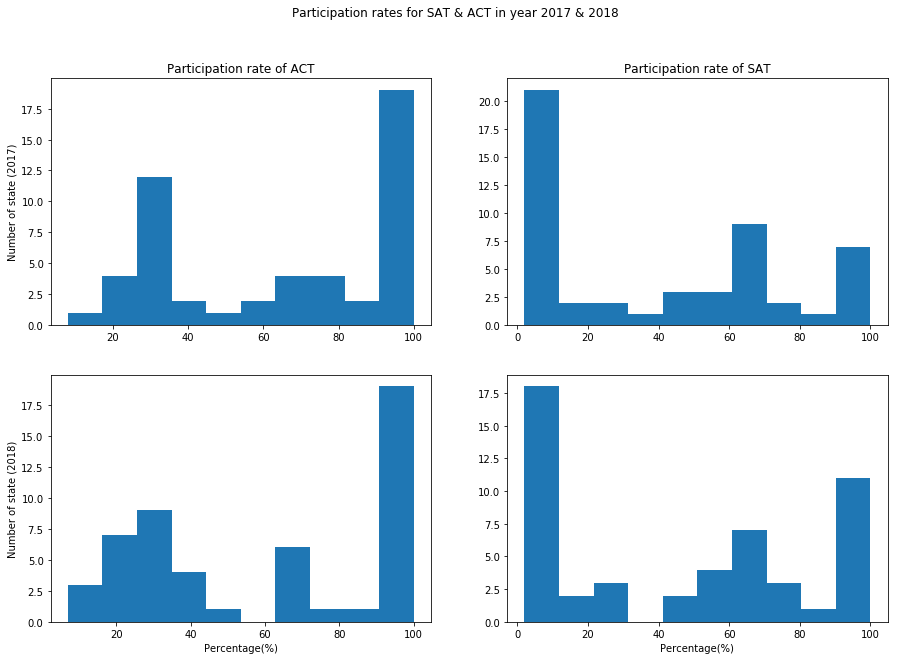

In [153]:
subplot_histograms(10,rate_sat_act ,hist_participation_titles, hist_participation_xlabels,
                   hist_participation_ylabels, 'Participation rates for SAT & ACT in year 2017 & 2018')

From the histrograms of Participation rates for SAT & ACT:<br>
1. The number of states with 100% ACT participation rate is near to the number of states with 0% SAT participation rate. This suggests that most students will choose either one of the test. <br>
2. Some states requires students to take certain exam, this explains the possiblities of 100% participation rate.<br>
3. The existing of bias (mandatory to test exam), causing the graph does not behave in normal distribution.

In [141]:
#prepare the data for second histogram(s)
hist_math = [final['act2017_math'], final['sat2017_math'], final['act2018_math'], final['sat2018_math']]
hist_math_titles = ['ACT Math score','SAT Math score','','']
hist_math_xlabels = ['','','Score (1~36)','Score (200~800)']
hist_math_ylabels = ['KDE (2017)', '', 'KDE (2018)','']

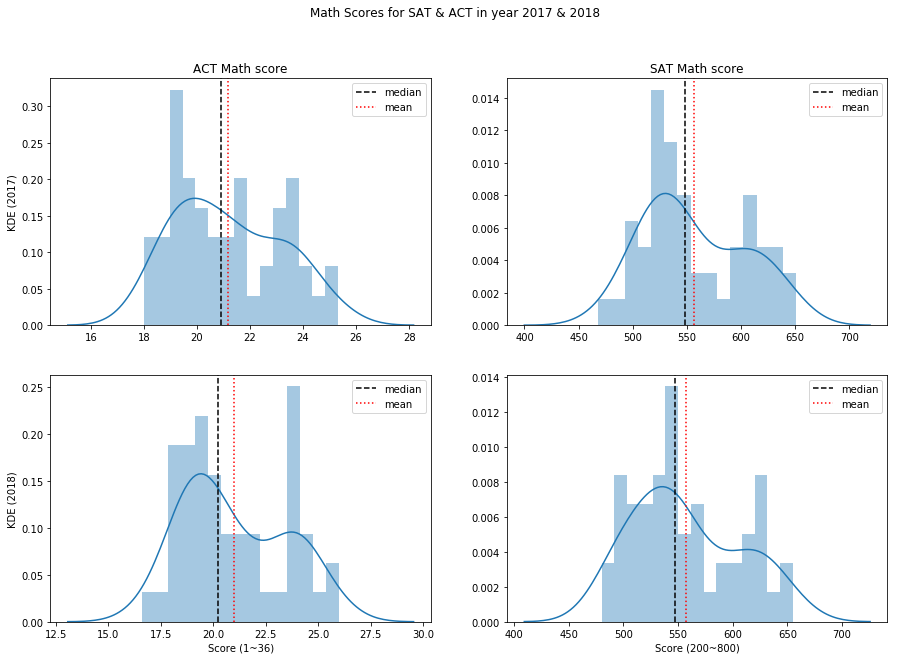

In [163]:
subplot_histograms2(15,hist_math ,hist_math_titles,hist_math_xlabels,
                   hist_math_ylabels, 'Math Scores for SAT & ACT in year 2017 & 2018', 1)

From the histrograms of Math scores for SAT & ACT:<br />
1. In general, the shape of distribution are skewed right, which is justified by the data where the mean is larger than median.
2. Based on the kde, math scores for SAT in 2017 and 2018 follow a similar pattern of distribution. ACT math scores in 2018 follow a similar distribution of math scores in 2017. <br>
3. All of the histograms have a similar pattern, this suggests that all the data used might have a strong correlation. But we will need to justified it in the later section. 

In [ ]:
# #prepare the data for second histogram(s)
# hist_rv = [final['act2017_reading'], final['sat2017_erw'], final['act2018_reading'], final['sat2018_erw']]
# hist_rv_titles = ['ACT Reading score','SAT ERW score','','']
# hist_rv_xlabels = ['','','Score (1~36)','Score (200~800)']
# hist_rv_ylabels = ['Number of state (2017)', '', 'Number of state (2018)','']

In [175]:
#erw in SAT represents the average of english and reading in ACT
act2017_er = (final['act2017_reading'] + final['act2017_reading'])/2
act2018_er = (final['act2018_reading'] + final['act2018_reading'])/2

In [178]:
#prepare the data for second histogram(s)
hist_rv = [act2017_er, final['sat2017_erw'], act2018_er, final['sat2018_erw']]
hist_rv_titles = ['ACT Reading/English score','SAT ERW score','','']
hist_rv_xlabels = ['','','Score (1~36)','Score (200~800)']
hist_rv_ylabels = ['KDE (2017)', '', 'KDE (2018)','']

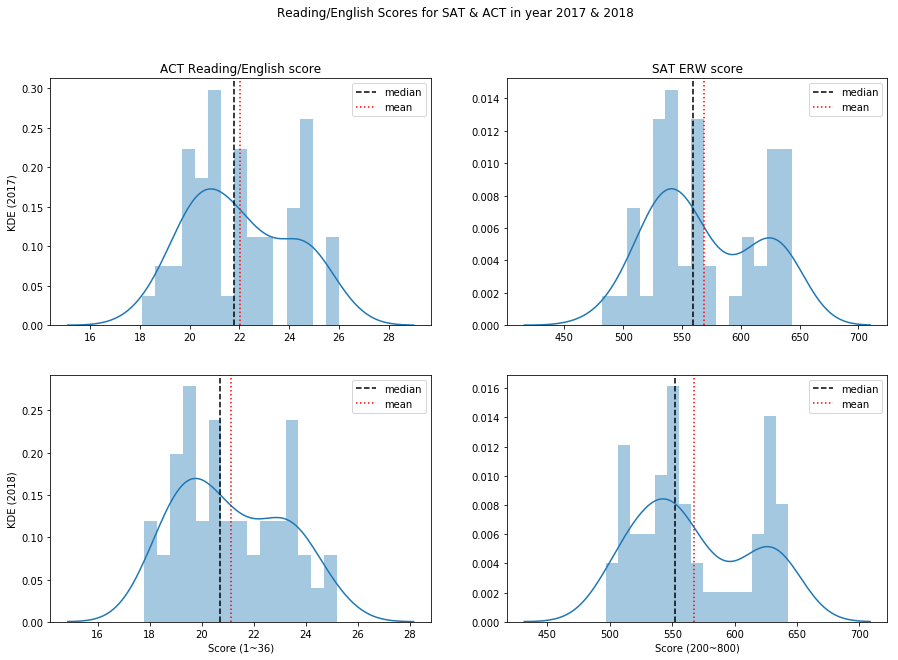

In [179]:
hist_rv = [act2017_er, final['sat2017_erw'], act2018_er, final['sat2018_erw']]
subplot_histograms2(15,hist_rv ,hist_rv_titles,hist_rv_xlabels,
                   hist_rv_ylabels, 'Reading/English Scores for SAT & ACT in year 2017 & 2018', 1)

In [180]:
# subplot_histograms2(15,hist_rv ,hist_rv_titles,hist_rv_xlabels,
#                    hist_rv_ylabels, 'Reading/Verbal Scores for SAT & ACT in year 2017 & 2018', 1)

From the histrograms of Reading/Verbal Scores for SAT & ACT in year 2017 & 2018:<br />
1. We could observe that, the distribution of reading/english scores for year 2017 is similar to year 2018.  <br />
2. If we take a look at the ACT reading/english scores, we could notice that its mean is larger than median, thus form a right skewed distribution. 
3. For SAT erw, it is bimodal distribution. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [183]:
#plot scatter with similar scale in the same axis
def subplot_scatter(df ,list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, main_title, ncols):
    
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(15,5)) 
    fig.suptitle(main_title)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        x, y = column
        sns.regplot(x, y, data=df, fit_reg=True, scatter_kws={"color":"blue","alpha":0.4,"s":80}, ax=ax[i] )
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel=list_of_ylabels[i])
    plt.show()

In [83]:
#plot individual scatter
def plot_scatter(x, y, df, title, ylabel, xlabel):
    sns.lmplot(x, y, data=df, fit_reg=True, scatter_kws={"color":"blue","alpha":0.4,"s":100}, size=6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [84]:
#declare the variables 
s1_scatter = ['sat2017_math', 'act2017_math'],['sat2017_erw', 'act2017_reading'],['sat2017_erw', 'act2017_reading']
s1_titles =['SAT vs. ACT math scores for 2017','SAT vs. ACT reading/verbal scores for 2017','SAT vs. ACT total/composite scores for 2017']
s1_xlabels =['SAT math scores','SAT reading scores', 'SAT total scores']
s1_ylabels = ['ACT math scores','ACT reading scores', 'ACT composite scores']

s1_main ='Comparison of different subjects scores for ACT and SAT in year 2017'

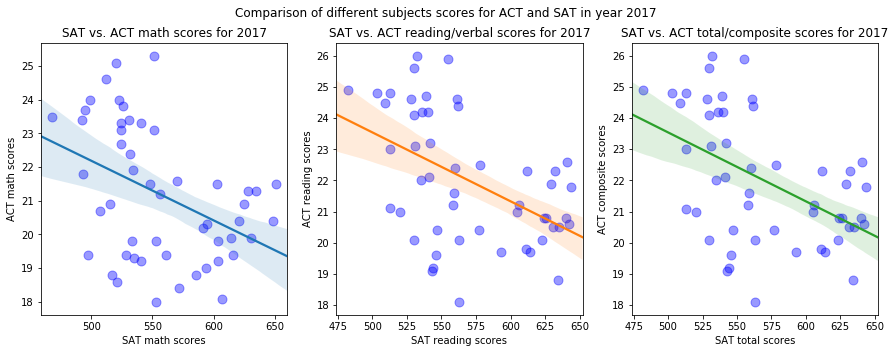

In [186]:
subplot_scatter(final, s1_scatter, s1_titles, s1_xlabels, s1_ylabels, s1_main, 3)

From the above scatter plots:

1. Each ACT subject has negative weak correlation with its corresponding SAT test.<br >
2. This could suggests that they are indirectly related with each other through certain factor. <br>
3. I feel that some states might be more focusing on one of the test, thus the schools in that state will be well equiped with the knowledge and materials needed to score better in that test compare to the other.


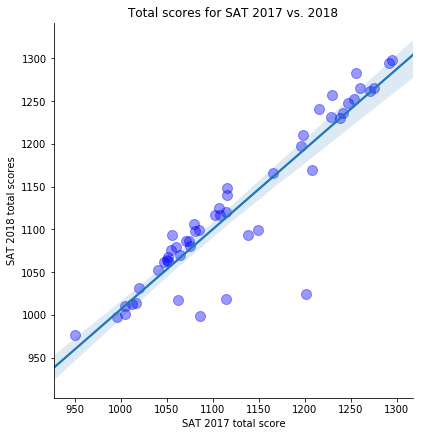

In [86]:
plot_scatter('sat2017_total', 'sat2018_total', final,'Total scores for SAT 2017 vs. 2018',
             'SAT 2018 total scores', 'SAT 2017 total score')

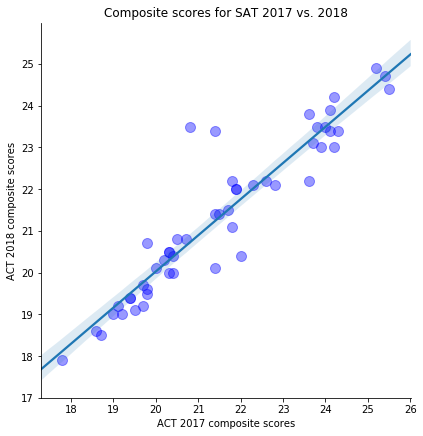

In [87]:
plot_scatter('act2017_composite', 'act2018_composite', final,'Composite scores for SAT 2017 vs. 2018',
             'ACT 2018 composite scores', 'ACT 2017 composite scores' )

From the above scatter plots: <br >
1. The test result in 2017 has a strong positive correlation with the test result in 2018 for both tests.  <br />
2. All the states are trying to improve or at least maintance their test result throughtout the year. <br />
3. This could be use to predict the test result of a state in the coming year. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [88]:
sat_data = final[['sat2017_erw', 'sat2018_erw', 'sat2017_math','sat2018_math', 'sat2017_total', 'sat2018_total']]
act_data = final[['act2017_english','act2018_english',  'act2017_math', 'act2018_math', 'act2017_reading', 'act2018_reading', 
                      'act2017_science', 'act2018_science', 'act2017_composite', 'act2018_composite']]

In [89]:
def subplot_boxplot(df ,list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, figsize =(14,5),orient = 'h'):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        
        sns.boxplot(data=df[column], ax=ax[i], orient =orient)
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel=list_of_ylabels[i])
    fig.tight_layout()
    plt.show()

In [187]:
#declare variables
box = ['sat2017_erw', 'sat2018_erw', 'sat2017_math','sat2018_math'],['sat2017_total', 'sat2018_total']
box_titles = ['SAT subjects', 'score in 2017 & 2018', 'SAT total score in 2017 & 2018']
box_ylabels = ['SAT subjects','SAT total scores']
box_xlabels = ['Scores']*2

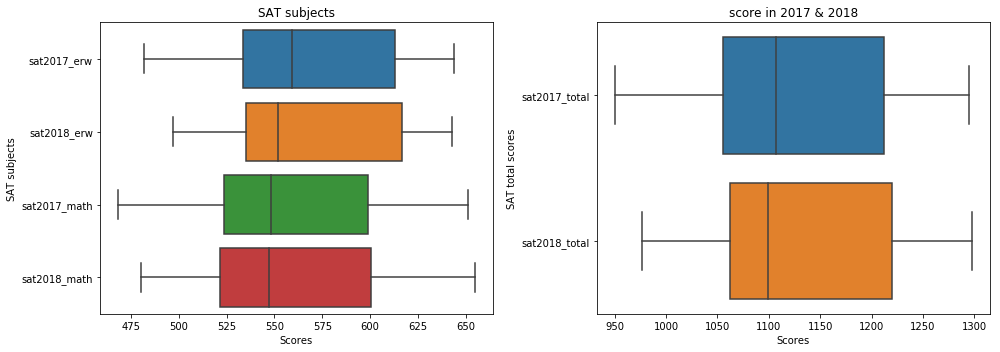

In [188]:
subplot_boxplot(final,box,box_titles,box_xlabels,box_ylabels)

From the boxplots above:
1. They are not symmetric but positive skewed. <br>
2. The minimun scores for SAT in year 2018 is improved compared to previous year, but the average score is worsen.<br>
3. This could suggest that the new SAT format helps in improving minimun SAT scores, but schools and students need more time to get familiar with the new format before it could shows its impact.

In [92]:
#declare variables
box2 = ['act2017_english','act2017_math','act2017_science','act2017_reading','act2017_composite'], ['act2018_english','act2018_math','act2018_science','act2018_reading','act2018_composite']
box2_titles= ['ACT subjects/composite score in 2017', 'ACT subjects/composite score in 2018']
box2_ylabels = ['ACT subjects/composite 2017','ACT subjects/composite 2018']
box2_xlabels = ['Scores']*2

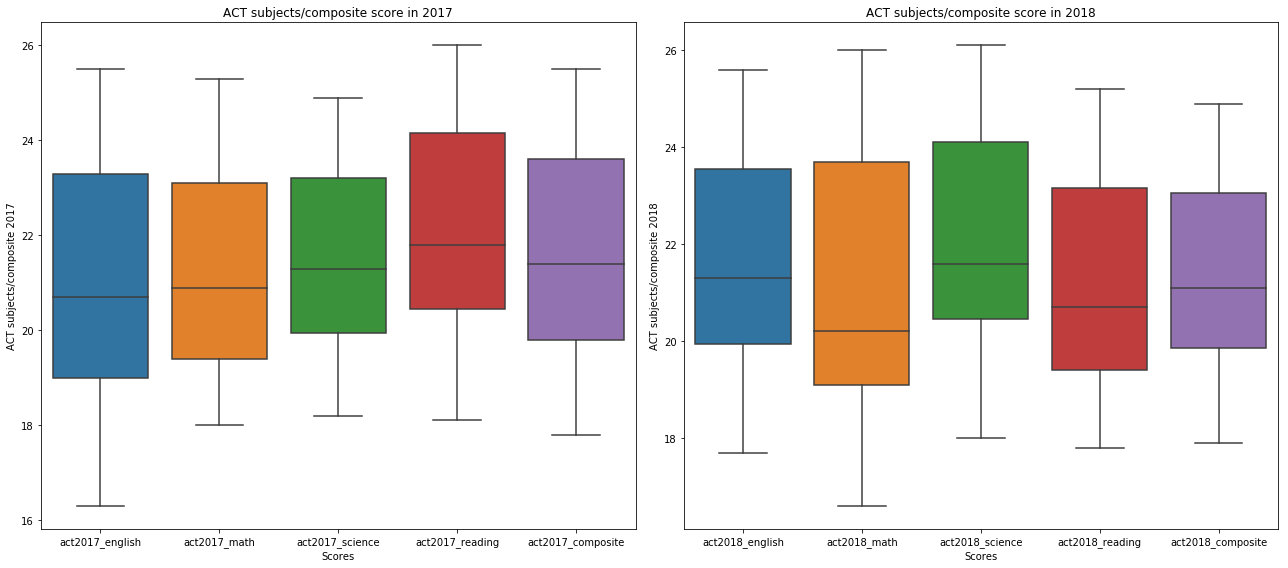

In [189]:
subplot_boxplot(final,box2,box2_titles,box2_xlabels,box2_ylabels, (18,8), 'v')

From the boxplots above:
1. They are not symmetric but positive skewed.
2. The average score for English and Science of ACT 2018 are improved compared to the previuos year. The opposite happened to Math and reading. This result in the slight drop of average composite score for ACT 2018.<br>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### 1. Average participation rate for ACT & SAT in 2017
It will be easier to identify the maximun, minimun or other form of comparison acrross the states for both tests by plotting this bar chart.

In [202]:
final_sorted = final.sort_values(['act2017_participation(%)','sat2017_participation(%)'])

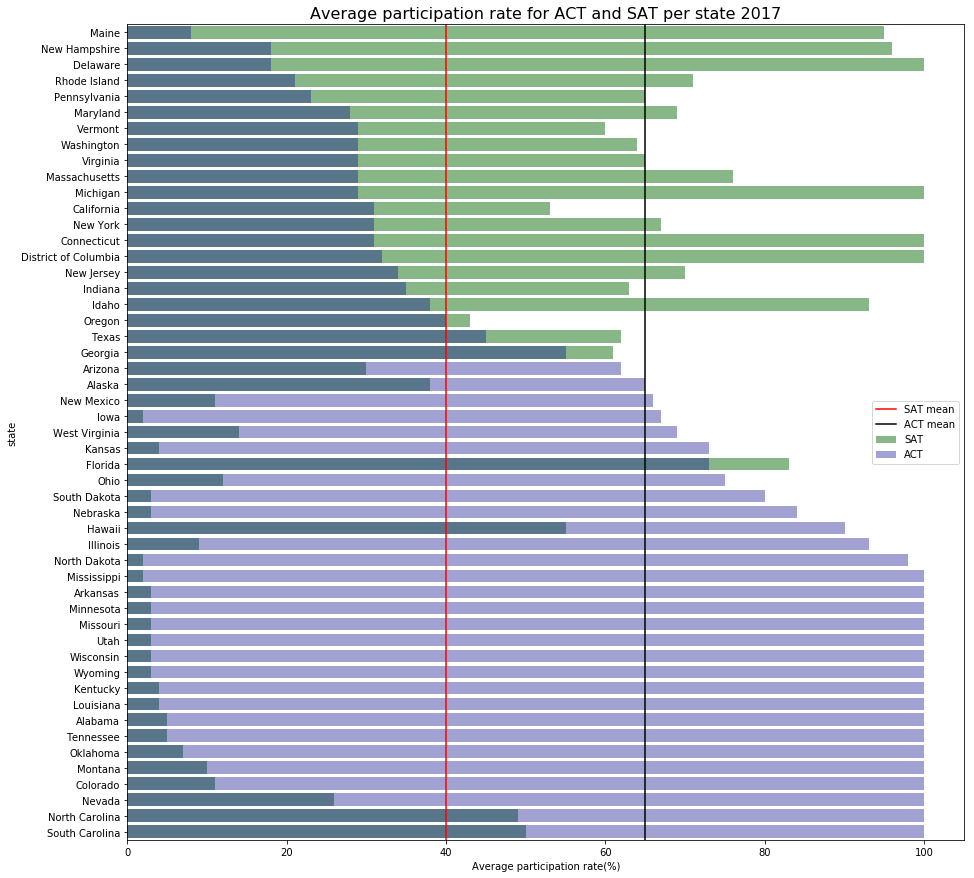

In [204]:
sns.set_context({"figure.figsize": (15, 15)})
           
#Plot act
sns.barplot(x = final_sorted['sat2017_participation(%)'], y = final_sorted['state'], 
                             color = "green", alpha =0.5, label='SAT')
#Plot sat
sns.barplot(x = final_sorted['act2017_participation(%)'], y = final_sorted['state'], 
                             color = "#0000A3", alpha=0.4, label='ACT')

plt.axvline(40, label="SAT mean", color='red') # make a vertical line 
plt.axvline(65, label="ACT mean", color='k') 
plt.title('Average participation rate for ACT and SAT per state 2017', fontsize=16)
plt.xlabel('Average participation rate(%)')
plt.legend()

### 2. Scatter plot of total/composite score vs. participation rate for SAT and ACT in 2017 and 2018
This plots are used to find out any possible change with the new SAT format.

In [284]:
def subplot_scatter2(df ,list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, vline):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        x, y = column
        sns.regplot(x, y, data=df, fit_reg=True, scatter_kws={"color":"blue","alpha":0.4,"s":80}, ax=ax[i] )
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel=list_of_ylabels[i])
        ax[i].axhline(y = vline[i], color='red', linestyle=':', label='National average' )  
        ax[i].legend
    plt.show()

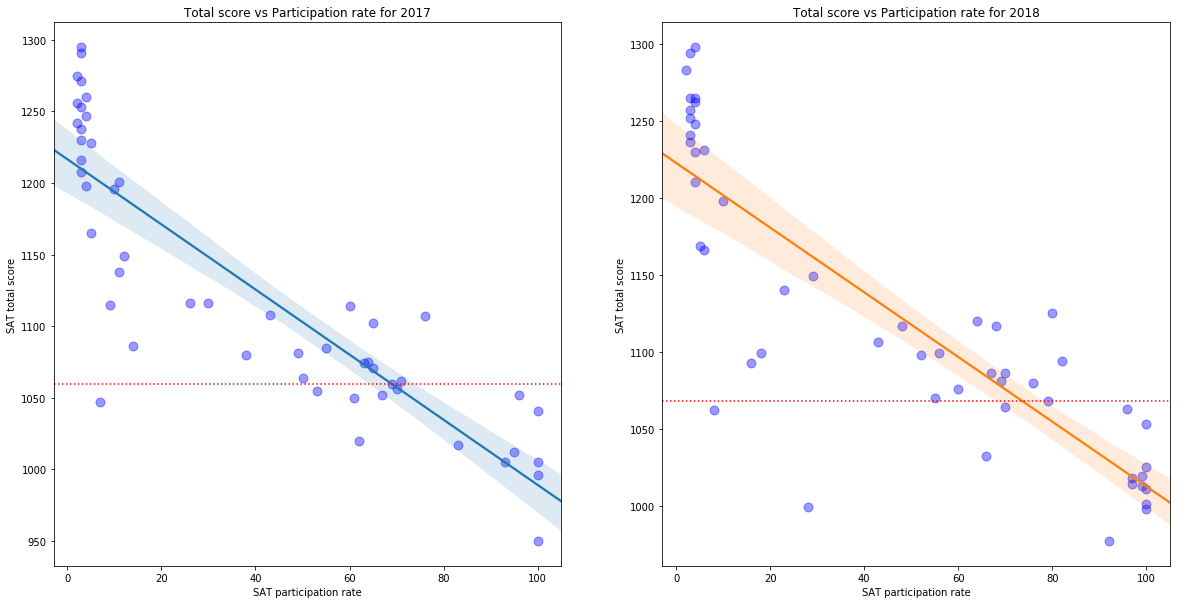

In [285]:
#declare the variables 
s2_scatter = ['sat2017_participation(%)','sat2017_total'],[ 'sat2018_participation(%)','sat2018_total']
s2_titles =['Total score vs Participation rate for 2017','Total score vs Participation rate for 2018']
s2_xlabels =['SAT participation rate']*2
s2_ylabels = ['SAT total score']*2
s2_national = [1060, 1068]

subplot_scatter2(final, s2_scatter, s2_titles, s2_xlabels, s2_ylabels, s2_national)

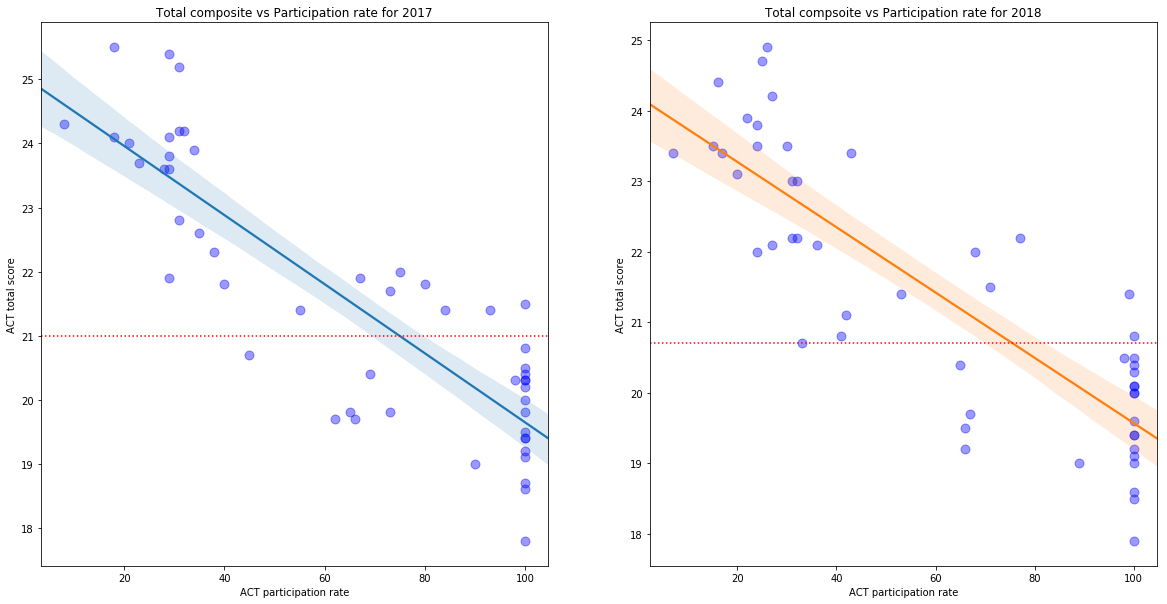

In [370]:
s2_scatter = ['act2017_participation(%)','act2017_composite'],[ 'act2018_participation(%)','act2018_composite']
s2_titles =['Total composite vs Participation rate for 2017','Total compsoite vs Participation rate for 2018']
s2_xlabels =['ACT participation rate']*2
s2_ylabels = ['ACT total score']*2
s2_national = [21, 20.7]

subplot_scatter2(final, s2_scatter, s2_titles, s2_xlabels, s2_ylabels, s2_national)

1. The scatter plots show that, the higher the participation rate of an exam, the lower the total/composite score.<br />
2. It is mandatory for some states to take certain exam, which results in a higher participation rate. While for those states with a lower participatio rate, the students are more likely take the exam voluntary, because they are well prepared and confident in the exam to score a higher mark. Thus, this resulting in the negative correlation for participation rate and result. <br>
3. Since there is a bias factor involved, we cannot conclude that by increasing the participation rate, the students score will be lower, and vice versa.<br>
4. For both tests, there are not much change for year 2017 and 2018 in term of the number of states that are score higher than the national average.<br>
5. But we would expect the increase in number states that are able to score better than national averaga after the change in SAT format. This may be because more time is need for students to get familiar with the exam. 2 years of data is not enough to spot the real significant impact of the change and make a conclusive analysis.<br> 

### 3. Participation rate delta for SAT and ACT
This plot could tell us about their relationship

Text(0.5,0,'Delta')

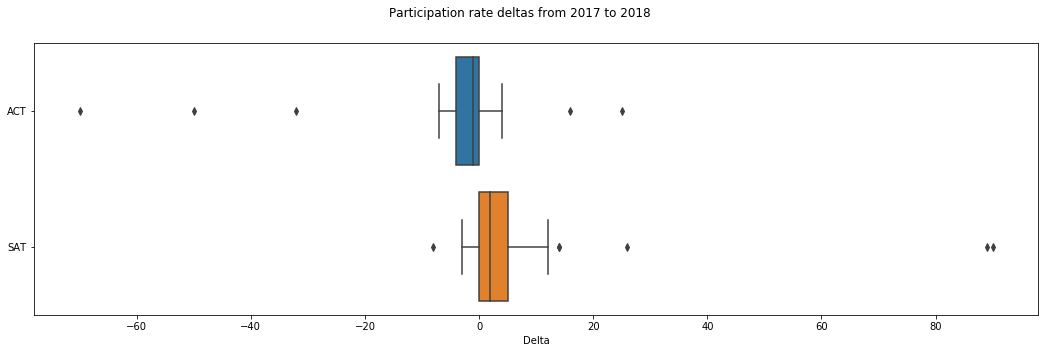

In [300]:
fig, ax = plt.subplots(figsize=(18,5))
sns.boxplot(data=[final['act_change'],final['sat_change']],ax=ax, orient = 'h')
fig.suptitle('Participation rate deltas from 2017 to 2018')
ax.set_yticklabels(['ACT','SAT'])
ax.set_xlabel('Delta')


In [304]:
def plot_scatter(x, y, df, title, ylabel, xlabel):
    sns.lmplot(x, y, data=df, fit_reg=True, scatter_kws={"color":"blue","alpha":0.4,"s":10}, size=7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

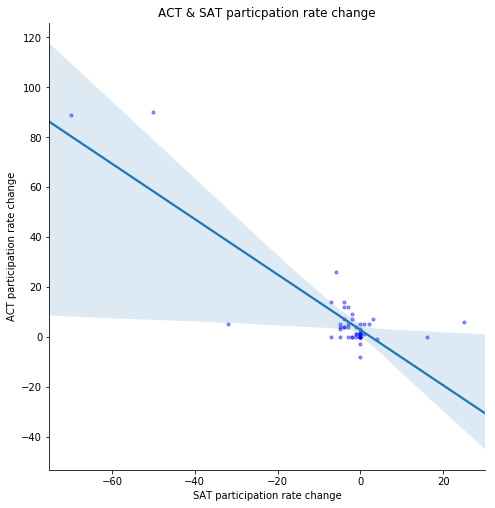

In [305]:
plot_scatter('act_change', 'sat_change', final,'ACT & SAT particpation rate change',
             'ACT participation rate change', 'SAT participation rate change' )

1. From the scatter plot, we could tell that the participation rate change for SAT and ACT are negatively correlated.<br>
2. From the boxplot, we could notice that the amout of increase in the participation rate of SAT is similar to the amount of decrease for ACT. <br>
3. It is kind of like zero sum game, in order for SAT to increase its partcipation rate, College Board needs to think of a way to 'grab' those students who are planning to take ACT. 

## 4. Participation rate of ACT vs SAT

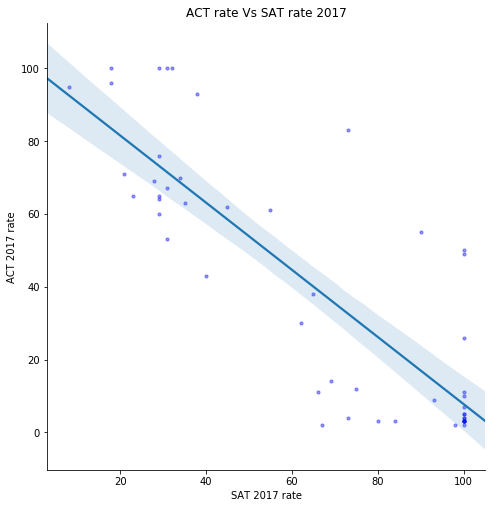

In [373]:
plot_scatter('act2017_participation(%)', 'sat2017_participation(%)', final,'ACT rate Vs SAT rate 2017',
             'ACT 2017 rate', 'SAT 2017 rate' )

We could notice that SAT and ACT rate have a strong negative correlation.<br>
1. Students usually will focus on one of the exam which they are more confident<br>
2. Take the test which recognise by their target college<br>
3. Mandatory test set by state

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [97]:
#test all columns except 'state'
numeric_columns = [i for i in final.columns if i != 'state']

In [306]:
for col in numeric_columns:
    norm_pvalue = normaltest(final[col]).pvalue # do a normal test, return p value
    col_skew = skew(final[col]) # do the skew test
    if norm_pvalue < .05: 
        print('{} is not normally distributed since the pvalue {} is less than .05. The skew is {}, right skewed.\n'
              .format(col, round(norm_pvalue,2), round(col_skew,2)))
    else:
        print('{} is normally distributed since the pvalue {} is greater than .05. The skew is {}, left skewed.\n'
              .format(col, round(norm_pvalue,2), round(col_skew,2)))

act2017_participation(%) is not normally distributed since the pvalue 0.0 is less than .05. The skew is -0.19, right skewed.

act2017_english is normally distributed since the pvalue 0.08 is greater than .05. The skew is 0.34, left skewed.

act2017_math is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.32, right skewed.

act2017_reading is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.26, right skewed.

act2017_science is normally distributed since the pvalue 0.06 is greater than .05. The skew is 0.21, left skewed.

act2017_composite is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.31, right skewed.

sat2017_participation(%) is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.34, right skewed.

sat2017_erw is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.26, right skewed.

sat2017_math is normally distributed since the pvalue 0.0

Answers: <br>
We pass our dataframe into 'normaltest', which is a function tests the null hypothesis, in our case 'a sample comes from a normal distribution'. We obtained the probability value(pvalue) and compare it with the threshold, 0.05. When a result has a p-value of 0.05 or lower we reject the null hypothesis.<br>

A skewness value > 0, means that there is more weight in the left tail of the distribution. It is right skewed where its mean is larger than mediam. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:<br>
1. For SAT and ACT Math, ACT reading, the distibution are right skewed.<br>
2. For SAT erw, the distribution shows an indication of bimodal. <br>
3. For the rates, the distribution also shows an indication of bimodal. <br>

The data we used is the mean from each individual state. It is not consider as random sampling. If we zoom in into each indiviudal state, the state will have all the students result, thus the data is from a pupulation rather than random sampling. We depends on normal distribution in the calculation but all the distribution does not follow this pattern. Thus the estimates will not be accurate. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: <br>

It does not make sense to conduct statistical inference. The average participation rate for a state is based on its own population, and different states consists of different number of participants (population). Thus, we need to consider the weight imposed on the respectively data based on their population size. <br>


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: <br>
From the histrograms plotted for comparing SAT and ACT math scores, their distribution pattern is similar. However from the scatter plots plotted for the same data, they are negative correlated. <br>
We only can compare these subject if the score are coming from the same person, which can be found from those students in the state with 100% participation rate. From the histogram plotted below, it shows that SAT and ACT math subject is positive correlation.<br>
The graph only represetns those state with 100% participation, thus we can only say that, they are somehow comparable. <br>
To further prove their correlation, we need to carry out a stratified sampling based on state population nation wide.

In [366]:
#create a column and category use np.select, np.where if only need 2 outputs
conditions = [(final['act2017_participation(%)']==100), (final['sat2017_participation(%)']==100)]
choices = ['ACT100', 'SAT100']
final['a_c_100'] = np.select( conditions, choices, default='Other')

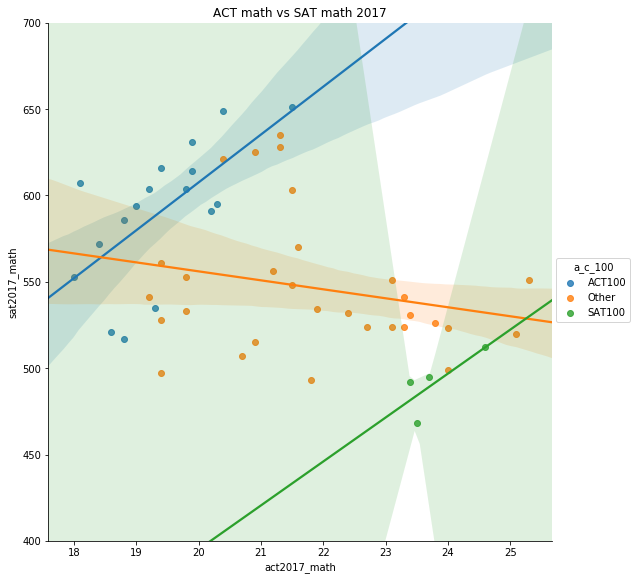

In [364]:
g = sns.lmplot( x="act2017_math", y="sat2017_math", data=final, fit_reg=True, hue='a_c_100', legend=True, size=8)
g.set(ylim=(400, 700), title = 'ACT math vs SAT math 2017')

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [99]:
final[final.state == 'Colorado'] # find the information about Coloradao

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025


1.Colorado. In 2017, she has a 100% particpation rate in ACT, and low participation rate in SAT(11%). But in 2018, she has a low participation rate in ACT (30%) and 100% participation rate in SAT. The drastically change is due to the reason, students are required to take the SAT instead of ACT starting year 2017.

In [100]:
final[final.state == 'Florida'] # find the information about Florida

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,97,522,493,1014


2.Florida. The participation rate for ACT and SAT are more than 50%. The total participation rate for both of the tests are more than 150% for either year. This suggests that more than 50% of students taking in both exams. That is drastically increase in SAT particiaption rate in 2018 after the launch of 'school day program' where students can take the exam during a regular school day with the cost covered by their schools. 

In [101]:
final[final.state == 'Michigan']

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_participation(%),act2018_english,act2018_math,act2018_reading,act2018_science,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011


3.Michigan has a high participation rate in SAT compared to ACT. Before Michigan added SAT to the Michigan Student Test of Educational Progress in 2016, ACT was a must for students. Since the schools and students are more familiar with ACT compared SAT, Michigan students who taken ACT scores higher that the  national average, but it is opposite for those taken SAT.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [367]:
final[final.state == 'West Virginia']

,state,act2017_participation(%),act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation(%),sat2017_erw,sat2017_math,...,act2018_composite,sat2018_participation(%),sat2018_erw,sat2018_math,sat2018_total,act_change,sat_change,act100,sat100,a_c_100
48,West Virginia,69,20.0,19.4,21.2,20.5,20.4,14,558,528,...,20.4,28,513,486,999,-4,14,Other,Other,Other


## Conclusions
1. SAT participation rate is affected by ACT participation rate. <br>
2. College board need to convince the students that those do well in ACT could do the same in SAT. <br>
3. More data is needed to evaluate the impact of new SAT format. In future, if College board can show that the number of states score higher than the national average in SAT has improved, this could be an attraction point.<br>

## Recommendations
1. Since the new format was launch recently, there will not be enough past year paper for reference. College board can provide more sample test for students increase their confidence level in taking SAT. Then, College Board can conduct some seminars and let the teachers be informed about thier focus in the new SAT. 

2. The participation rate is strongly affected by individual state decision. College Board can work together with
3. Number of participants and geographical data could help in the investigations. state to give free test for those students from lower income family. Then, slowly make it a complusory test.
